
<div style="text-align:center"><font size=6><b>EJERCICIOS SEABORN</b></font></div>

<div style="text-align:center"><img src="https://media4.giphy.com/media/vf3LO38xXNRrq/giphy.gif?cid=ecf05e47cl9pyl4yub1755skxt1tbhfl1359573ak9cd4d1n&rid=giphy.gif" /></div>


### 1. Importa pandas, pyplot y seaborn

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Activa matplotlib de forma estática (eso del ``inline``)

In [2]:
%matplotlib inline

### 3. Lee 'Pokemon.csv', lee la primera columna del csv como índice del DataFrame

In [3]:
import pandas as pd
df = pd.read_csv("../../../data/Pokemon.csv", encoding='latin1')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
147,148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


### 4. Muestra las primeras filas del dataset para hacerte una idea de los datos cargados

In [4]:
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


### 5. Haz un gráfico de dispersión con ``lmplot()``, que es un método que además pinta una regresión lineal, para representar cómo varía el Ataque (eje X) en función de la Defensa (eje Y)

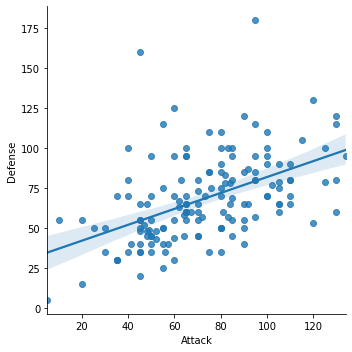

In [5]:
sns.lmplot(data=df, x='Attack', y='Defense')

¿Se ajusta bien? ¿No? Al fin y al cabo, lo que estamos haciendo es ver la relación lineal entre Ataque y Defensa, ¿podrías cuantificar esta relación de alguna manera y justificar así lo que acabas de ver?

In [6]:
df.corr().loc['Attack', 'Defense']

0.4919654602666427

### 6. No queremos ver la línea recta del modelo de regresión lineal que relaciona Ataque y Defensa

Prueba a consultar la [documentación](https://seaborn.pydata.org/generated/seaborn.lmplot.html) para ver qué parámetro debes modificar:

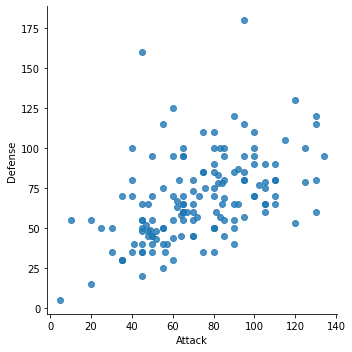

In [7]:
sns.lmplot(data=df, x='Attack', y='Defense', fit_reg=False)

### 7. Ahora queremos añadir otra dimensión más a nuestro gráfico, queremos ver el Stage junto con el Ataque y la Defensa

Consulta la documentación (o básate en lo que hemos visto en clase en otros métodos) para representar Stage con el color:

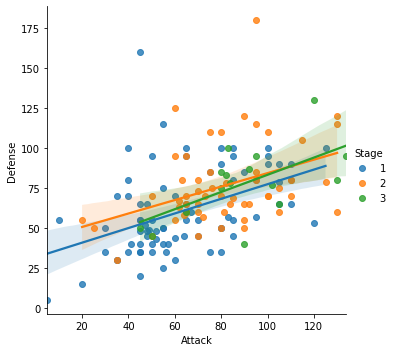

In [8]:
sns.lmplot(data=df, x='Attack', y='Defense', hue='Stage')

Limita ahora esta representación entre los valores 20 y 80 de Ataque. Para hacerlo, puede que no exista un parámetro en la documentación, y que lo tengas que hacer por otras vías:

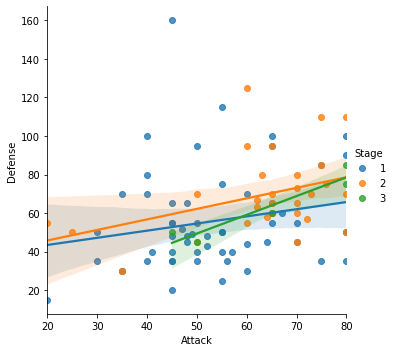

In [9]:
sns.lmplot(data=df[df['Attack'].apply(lambda x: 20 <= x <= 80)], x='Attack', y='Defense', hue='Stage')

### 8. Con las 3 gráficas juntas no seaprecian muy bien las relaciones, separa la gráfica en otras 3: una por cada valor de Stage

Para ello, puedes comprobar cómo lo hemos hecho en el notebook anterior (aunque fuera para otro método de representación), cuando utilizábamos un parámetro para que nos dividiera las gráficas en función de su valor. Si no, también puedes consultar la documentación.

(En este caso, no mantengas los límites del último apartado)

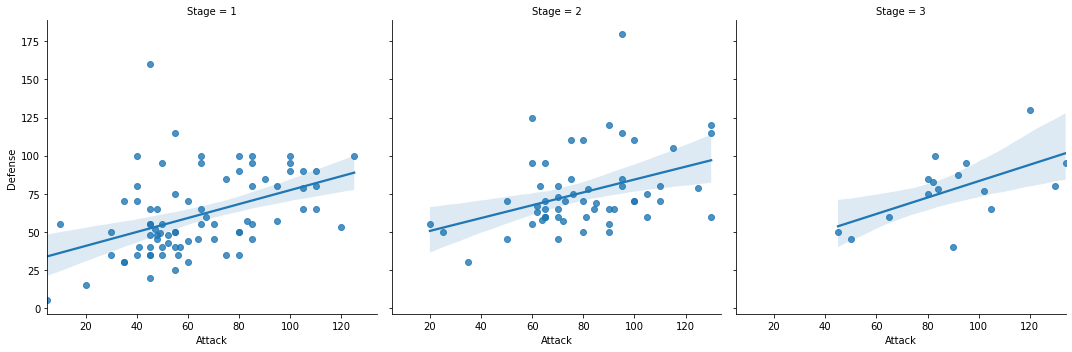

In [10]:
sns.lmplot(data=df, x='Attack', y='Defense', col='Stage')

Comprueba ahora, para cada uno de ellos, si alguno tiene una relación lineal lo suficientemente buena como para considerar que existe esta relación (establece el umbral en +/-0.7).

Para ello, utiliza lo que hemos visto con Pandas para separar el Dataframe.

In [11]:
df1 = df[df['Stage']==1]
print(f"Correlación Ataque-Defensa (Stage==1): {df1.corr().loc['Attack', 'Defense']}")

df2 = df[df['Stage']==2]
print(f"Correlación Ataque-Defensa (Stage==2): {df2.corr().loc['Attack', 'Defense']}")

df3 = df[df['Stage']==3]
print(f"Correlación Ataque-Defensa (Stage==3): {df3.corr().loc['Attack', 'Defense']}")

Correlación Ataque-Defensa (Stage==1): 0.44008756997217924
Correlación Ataque-Defensa (Stage==2): 0.3911298116183662
Correlación Ataque-Defensa (Stage==3): 0.5943040819362854


### 9. Dibuja un diagrama de cajas con el dataframe

¿De qué? Pues de todo lo que puedas.

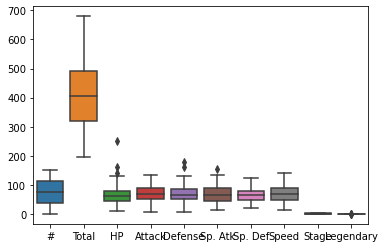

In [12]:
sns.boxplot(data=df)

### 10. Como puedes observar, representar todo lo que podemos quizás no sea la mejor idea.

Parece que las columnas Total, Stage y Legendary nos desvirtúan lo que estamos viendo, y la columna # tampoco parece que nos vaya a aportar mucho. Vuelve a dibujar los diagramas de caja sin incluirlas:

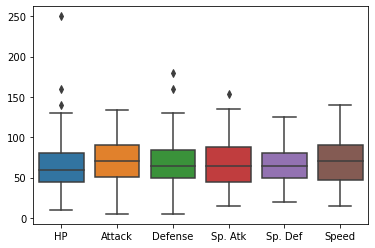

In [13]:
sns.boxplot(data=df[[col for col in df.columns if col not in ['#', 'Total', 'Stage', 'Legendary']]])

### 11. Dejemos los gráficos al lado por un momento. ¿Cuántos 'Type 1' diferentes hay en el DataFrame? ¿Cuáles? ¿Cuántos registros existen de cada tipo?

Si puedes, hazlo con una sola instrucción que nos de toda esa información.

In [14]:
df['Type 1'].value_counts()

Water       28
Normal      22
Poison      14
Fire        12
Bug         12
Grass       12
Rock         9
Electric     9
Psychic      8
Ground       8
Fighting     7
Dragon       3
Ghost        3
Fairy        2
Ice          2
Name: Type 1, dtype: int64

### 12. Quédate del Dataframe solo con los 'Type 1' que tengan más de 7 registros. ¿En cuáles de ellos puedes apreciar relación lineal entre el Ataque y la Defensa? (Umbral 0.7)

In [15]:
tipos = df['Type 1'].value_counts()
tipos = tipos[df['Type 1'].value_counts()>7].index
tipos

tipos_corr = []

for tipo in tipos:
    corr = df[df['Type 1']==tipo].corr().loc['Attack', 'Defense']
    print(f"Tipo {tipo}: {corr}")
    if corr >= 0.7:
        tipos_corr.append(tipo)

Tipo Water: 0.5816073732196532
Tipo Normal: 0.7594030751714381
Tipo Poison: 0.6106328574290912
Tipo Fire: 0.600045705044611
Tipo Bug: 0.7702949136184848
Tipo Grass: -0.05044544996856937
Tipo Rock: -0.32906582182792643
Tipo Electric: 0.16145570516513902
Tipo Psychic: 0.9380032898459318
Tipo Ground: 0.603308346930462


In [16]:
tipos_corr

['Normal', 'Bug', 'Psychic']

### 13. Usa un estilo 'whitegrid' y representa un correlograma de las estadísticas Ataque, Defensa y HP, para cada uno de los tipos que has obtenido en el último ejercicio

Para cambiar el estulo, puedes consultar este apartado de la [documentación](http://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme). Y los correlogramas deberán representar también la regresión lineal.

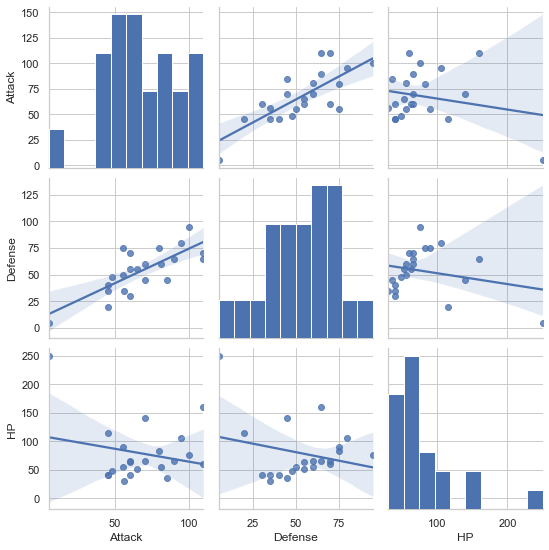

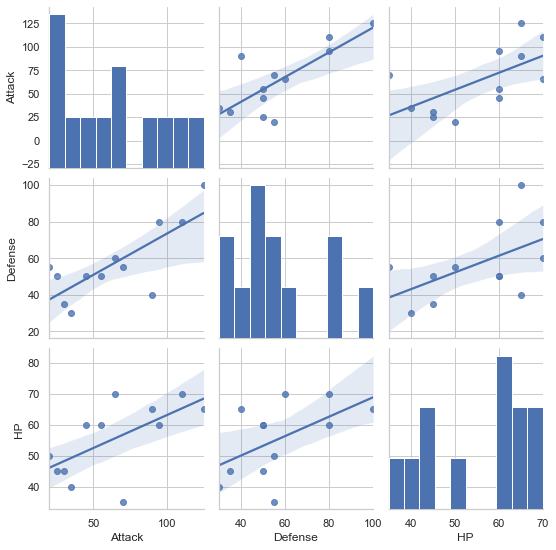

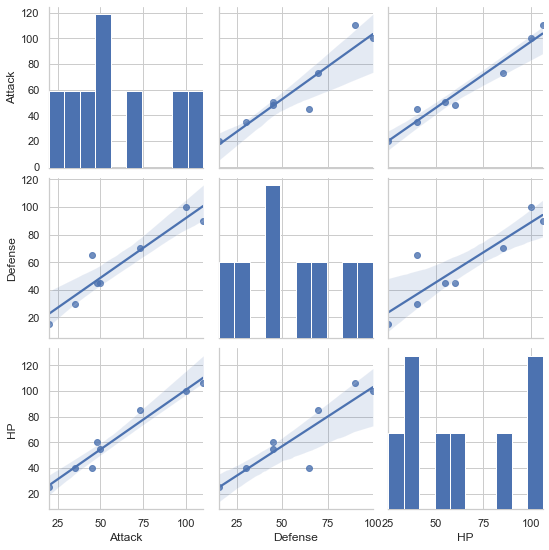

In [17]:
sns.set(style='whitegrid')

stats = ['Attack', 'Defense', 'HP']

for tipo in tipos_corr:
    sns.pairplot(df[df['Type 1']==tipo][stats], kind='reg')

### 14. Representa las mismas relaciones que en el apartado anterior pero cuantificándolas en un mapa de calor:

Si hacemos un bucle for para representar varios mapas de calor, se sobreescribirán uno sobre otro, por lo que no se verán bien. Para por verlo en 3 gráficas diferentes, deberíamos crear una nueva figura en cada iteración del bucle for con la siguiente línea ``fig = plt.figure()``.

Por otra parte, si queremos fijar la barra de color, podemos utilizar un par de parámetros del método, descritos en la [documentación](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) (si vas por orden no tardarás mucho).

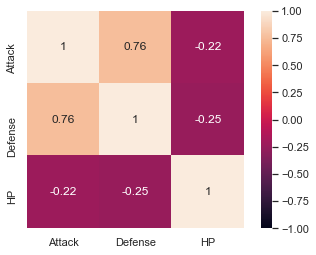

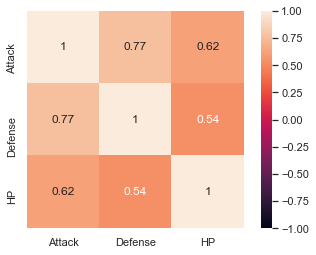

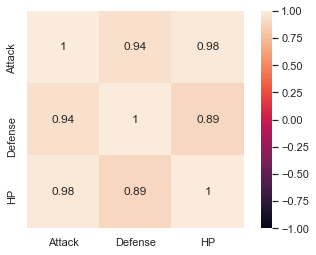

In [18]:
for tipo in tipos_corr:
    fig = plt.figure()
    sns.heatmap(df[df['Type 1']==tipo][stats].corr(), annot=True, square = True, vmin=-1, vmax=1)

### 15. Selecciona los tipos 'Grass', 'Fire' y 'Water', y refleja, en un diagrama de violín, el 'Type 1' (eje X) frente al Ataque (eje Y):

Para ello, utiliza la función ``catplot``.

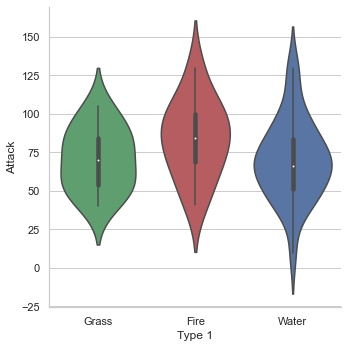

In [19]:
sns.catplot(x="Type 1", y="Attack", kind="violin", data=df[df['Type 1'].isin(['Grass', 'Fire', 'Water'])], palette=sns.color_palette(['g', 'r', 'b']));

### 16. Está bien, pero los colores no se corresponden con lo que uno espera para agua, fuego y planta

Para seleccionar los colores que quieras, puedes usar la paleta de colores mediante el siguiente parámetro:

``palette=sns.color_palette([color1, color2, color3, color4...])``

donde colorX es el color especificado como lo harías para cualquier otro gráfico. El tamaño de la lista de colores se debe corresponder conlos diferentes valores de lo que estés representando en el eje X.

Ahora que ya sabes, utiliza los colores aporpiados para cada uno

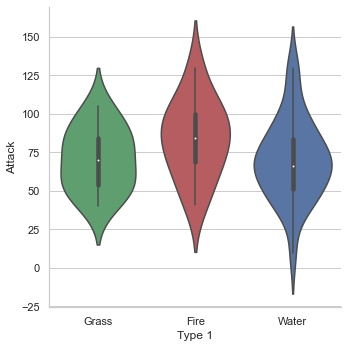

In [20]:
sns.catplot(x="Type 1", y="Attack", kind="violin", data=df[df['Type 1'].isin(['Grass', 'Fire', 'Water'])], palette=sns.color_palette(['g', 'r', 'b']));

Repite este gráfico de forma que en cada violín se represente tanto el Ataque como la Defensa, para lo que deberás modificar el dataframe:

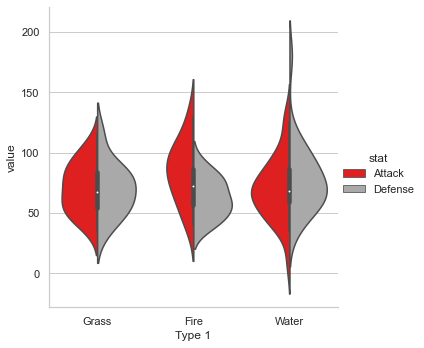

In [21]:
df_violin = df[df['Type 1'].isin(['Grass', 'Fire', 'Water'])]

df_violin_1 = df_violin[['Type 1', 'Attack']].rename(columns={'Attack': 'value'})
df_violin_1['stat'] = 'Attack'
df_violin_2 = df_violin[['Type 1', 'Defense']].rename(columns={'Defense': 'value'})
df_violin_2['stat'] = 'Defense'

df_violin = df_violin_1.append(df_violin_2)

sns.catplot(x="Type 1", y="value", hue='stat', kind="violin", split=True, data=df_violin, palette=sns.color_palette(['red', 'darkgrey']));

### 17. Con el diagrama de violín vemos la forma de la distribución, pero no sabemos si Grass tiene muchos puntos y Fire tiene muy pocos.

Para ver esto, podemos usar swarmplot. Pinta el primero de los diagramas de violines del ejercicio anterior pero con un swarmplot en lugar de un violín, para lo que tendrás que cambiar un parámetro del ``catplot``

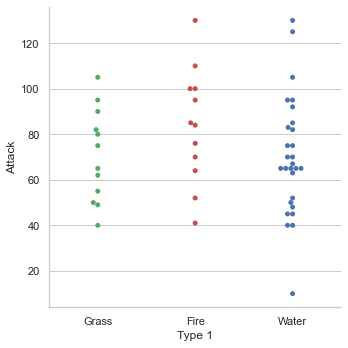

In [22]:
sns.catplot(x="Type 1", y="Attack", kind="swarm", data=df[df['Type 1'].isin(['Grass', 'Fire', 'Water'])], palette=sns.color_palette(['g', 'r', 'b']));

### 18. Queremos ver los violines a la vez que los swarm, los podemos pintar juntos. 

Para ello, deberemos utilizar por separado ambas representaciones, no pudiéndolas combinar con catplot. Revisa cómo lo hemos hecho en el notebook anterior. Además, elimina los diagramas de caja dentro de los violines con el parámetro inner = None y pon una transparencia de 0.9


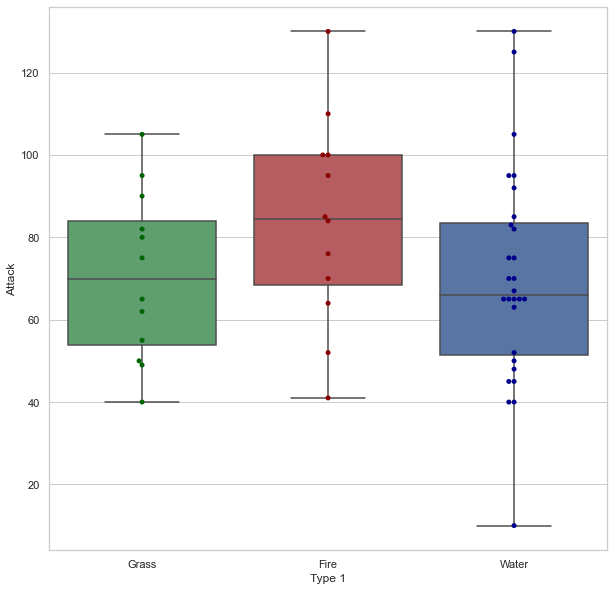

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df[df['Type 1'].isin(['Grass', 'Fire', 'Water'])], x='Type 1', y='Attack', palette=sns.color_palette(['g', 'r', 'b']))
sns.swarmplot(data=df[df['Type 1'].isin(['Grass', 'Fire', 'Water'])], x='Type 1', y='Attack', color="black", 
              palette=sns.color_palette(['darkgreen', 'darkred', 'darkblue']));

### 19. Veamos la función melt() de pandas. ``pd.melt()`` toma los valores de varias columnas y los junta todos en una misma columna nueva.

Dado un DataFrame, ``melt`` recibe varios parámetros:
  * qué columnas del DataFrame se quedan igual
  * qué nombres de columnas del dataframe pasan a ser una columna nueva
  * cómo queremos llamar esas nuevas columnas

Primero, crea un dataframe ``df_grass_fire_water`` quedándote con los valores de "Type 1": "Water", "Fire" y "Grass", y muestra las primeras filas para recordar su forma:

In [24]:
df_grass_fire_water = df[df['Type 1'].isin(["Grass", "Fire", "Water"])]
df_grass_fire_water.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


### 20. Queremos dejar igual las variables 'Name' y 'Type 1', así como añadir una columa nueva cuyos valores sean las columnas que queremos apilar y que se llame 'New Column'

Para llevar esto a cabo escribimos df_grass_fire_water.melt(id_vars=['Name', 'Type 1'], value_vars=[columna1, columna2...], var_name='New Column')

donde \[columna1, columna2...\] es la lista con las columnas a apilar, que en este caso serán 'HP', 'Attack', 'Defense' y 'Speed'. Lo guardaremos en una variable llamada ``df_melted``

In [25]:
df_melted = df_grass_fire_water.melt(id_vars=['Name', 'Type 1'], value_vars=['HP', 'Attack', 'Defense', 'Speed'], var_name='New Column')

df_melted

,Name,Type 1,New Column,value
0,Bulbasaur,Grass,HP,45
1,Ivysaur,Grass,HP,60
2,Venusaur,Grass,HP,80
3,Charmander,Fire,HP,39
4,Charmeleon,Fire,HP,58
...,...,...,...,...
203,Gyarados,Water,Speed,81
204,Lapras,Water,Speed,60
205,Vaporeon,Water,Speed,65
206,Flareon,Fire,Speed,65


In [26]:
# 21. Pintamos el swarmplot con el melted y entendemos la información

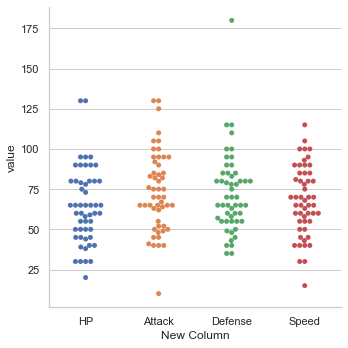

In [27]:
sns.catplot(x="New Column", y="value", kind="swarm", data=df_melted);

### 22. Basándote en el gráfico anterior, añade color en función del 'Type 1'

Para ello, utiliza el parámetro ``hue`` y usa la anterior paleta de colores Pokemon

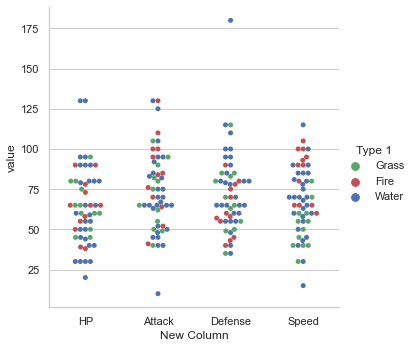

In [28]:
sns.catplot(x="New Column", y="value", hue='Type 1', kind="swarm", data=df_melted, palette=sns.color_palette(['g', 'r', 'b']));

Ahora, prueba qué ocurre al utilizar el parámetro ``dodge``:

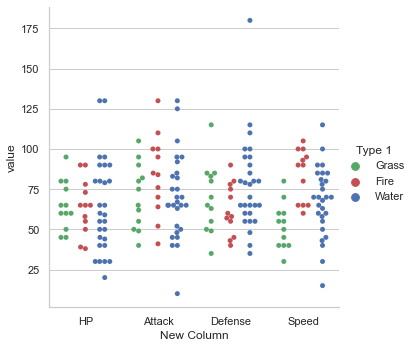

In [29]:
sns.catplot(x="New Column", y="value", hue='Type 1', kind="swarm", dodge=True, data=df_melted, palette=sns.color_palette(['g', 'r', 'b']));

### 23. Pinta el histograma y la densidad de probabilidad de la Defensa del dataframe original

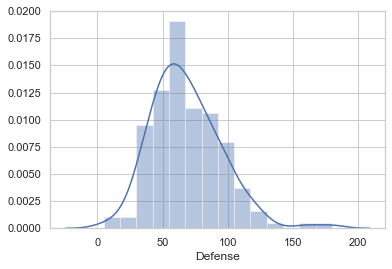

In [30]:
sns.distplot(df['Defense'])

### 24. Compara, en 3 gráficas diferentes, las densidades de probabilidad del Defensa (primera) y los histogramas del Ataque (segunda) para los que tienen 'Fire' como 'Type 1' frente a los que tienen "Water" y "Grass"

Respeta los colores que hemos usado con anterioridad y añade una leyenda

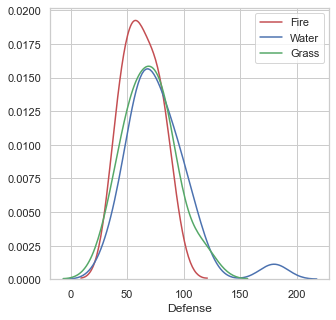

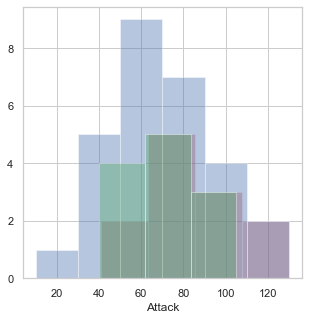

In [31]:
df_fire = df[df['Type 1']=='Fire']
df_water = df[df['Type 1']=='Water']
df_grass = df[df['Type 1']=='Grass']

plt.figure(figsize=(5, 5))
sns.distplot(df_fire['Defense'], hist=False, label="Fire", color='r')
sns.distplot(df_water['Defense'], hist=False, label="Water", color='b')
sns.distplot(df_grass['Defense'], hist=False, label="Grass", color='g')

plt.figure(figsize=(5, 5))
sns.distplot(df_fire['Attack'], kde=False, label="Fire", color='r')
sns.distplot(df_water['Attack'], kde=False, label="Water", color='b')
sns.distplot(df_grass['Attack'], kde=False, label="Grass", color='g')

¿Cuál te parece mejor? Utilízala para comparar la Velocidad de estos 3 tipos:

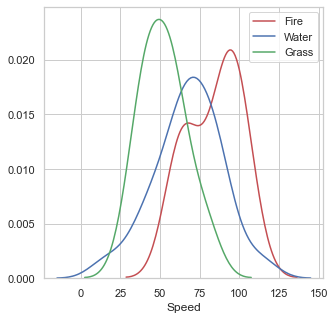

In [32]:
plt.figure(figsize=(5, 5))
sns.distplot(df_fire['Speed'], hist=False, label="Fire", color='r')
sns.distplot(df_water['Speed'], hist=False, label="Water", color='b')
sns.distplot(df_grass['Speed'], hist=False, label="Grass", color='g')

### 25. Pinta un diagrama de barras de la columna 'Type 1' usando el DataFrame original

Para ello, utiliza ``sns.countplot``. Usa ``plt.xticks`` para rotar las etiquetas de los tipos. Si lo necesitas, fíjate en los ejemplos de [aquí](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html).

Además, muéstralos ordenados de mayor a menor, para ello, podrás utilizar el parámetro ``order`` del ``countplot``, al que deberás pasarle una lista de strings con los valores de la variable cualitativa.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

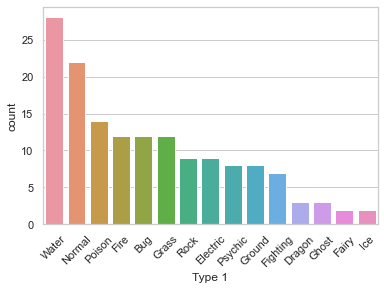

In [33]:
sns.countplot(df['Type 1'], order=df['Type 1'].value_counts().index)
plt.xticks(rotation=45)

### 26. Usa catplot para realizar 2 subplots: 1 (izquierda) para el Type 1 y otro (derecha) para el Type 2, donde se diferencie si es Legendary o no con el color

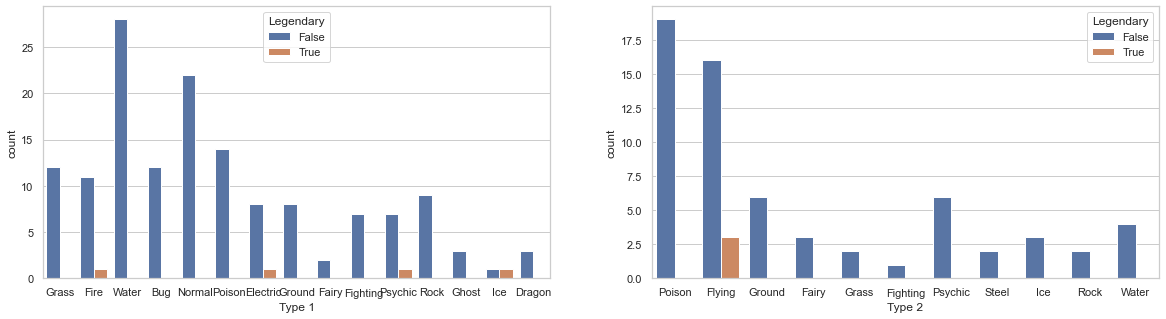

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(data=df, x='Type 1', hue='Legendary', ax=ax[0])
sns.countplot(data=df, x='Type 2', hue='Legendary', ax=ax[1])

### 27. Muestra una función distribución de probabilidad conjunta de la Defensa respecto al Ataque.

Una vez lo tengas, identifica, apoximadamente, en qué bin 2D donde caen la mayoría de puntos (ataque, defensa).

Identifica las etiquetas de los ejes y ponle un título a la gráfica.

C:\Users\TheBridge\anaconda3\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


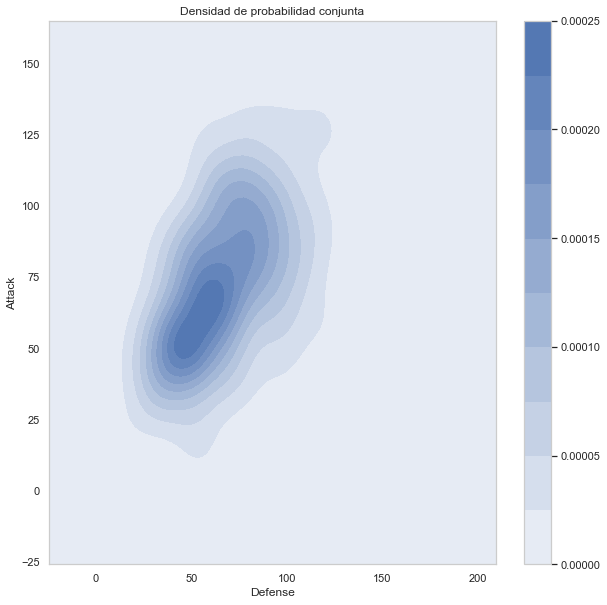

In [35]:
fig = plt.figure(figsize=(10,10))
sns.kdeplot(data=df[['Defense', 'Attack']], shade=True, cbar=True);

plt.xlabel("Defense");
plt.ylabel("Attack");

plt.title("Densidad de probabilidad conjunta");

Realiza ahora la misma comparación pero de tal manera que se vean los puntos agrupados en bins de forma hexagonal, y que también se muestren los histogramas de cada una, todo en el mismo gráfico:

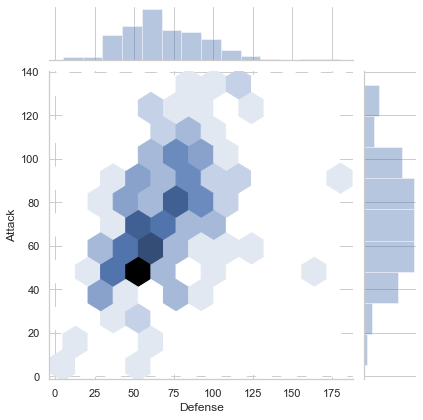

In [36]:
sns.jointplot(x = df['Defense'],
             y = df['Attack'],
              kind = 'hex');

### 28. Selecciona los Pokémons 3, 149 y 150, y representa con gráficos de barras, en 3 figuras diferentes, los valores de los stats 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed' del cada uno de estos Pokémon frente a los valores máximos para su Type 1:

Para construir el dataframe, recuerda que puedes utilizar la función ``pd.melt()``

In [37]:
pokes = df[df['#'].isin([3, 149, 150])]
# [['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

pokenames = pokes['Name'].values
poketypes = pokes['Type 1'].values
pokes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


In [38]:
max_type1 = df[df['Type 1'].isin(pokes['Type 1'].values)].groupby('Type 1').agg({'HP': 'max', 'Attack': 'max', 'Defense': 'max', 
                                                                                 'Sp. Atk': 'max', 'Sp. Def': 'max', 'Speed': 'max'})
max_type1 = max_type1.reset_index(drop=False)
max_type1

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Dragon,91,134,95,100,100,80
1,Grass,95,105,115,125,100,80
2,Psychic,106,110,100,154,120,130


In [39]:
pokes_melt = pokes.melt(id_vars=['Name', 'Type 1'], value_vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], var_name='Stats')
max_type1_melt = max_type1.melt(id_vars=['Type 1'], value_vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], var_name='Stats')

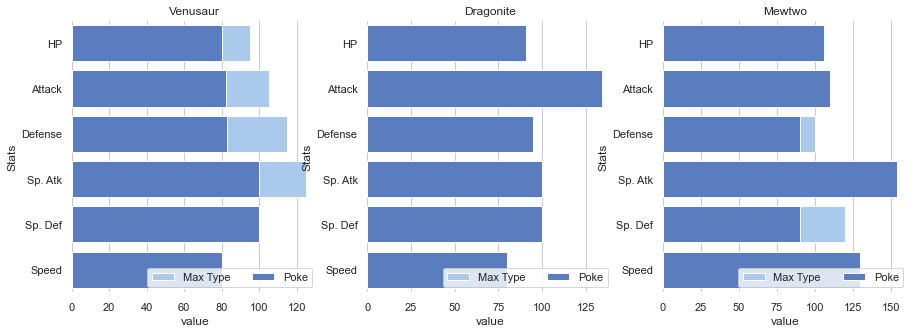

In [40]:

# Creamos figura y ejes:
f, ax = plt.subplots(1, 3, figsize=(15, 5))

for i in range(0, len(pokenames)):
    # Suicidios totales
    sns.set_color_codes("pastel")
    sns.barplot(y="Stats", x="value", data=max_type1_melt[max_type1_melt['Type 1']==poketypes[i]],
                label="Max Type", color="b", ax = ax[i])

    # Suicidios cuando la situación del país era inferior a cierto umbral
    sns.set_color_codes("muted")
    sns.barplot(y="Stats", x="value", data=pokes_melt[pokes_melt['Name']==pokenames[i]],
                label="Poke", color="b", ax = ax[i])

    # Añadimos la leyenda
    ax[i].legend(ncol=2, loc="lower right", frameon=True)
    sns.despine(left=True, bottom=True)

    ax[i].set_title(pokenames[i])